In [1]:
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

In [2]:
disasters = pd.read_csv('train.csv')
stop = stopwords.words('english')

#Si no encuentra "stopwords"
#import nltk
#nltk.download('stopwords')

## Analisis de los datos

In [3]:
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
disasters['text_word_count'] = disasters.text.str.count(' ') + 1
disasters['text_total_len'] = disasters.text.str.len()
disasters['text_stripped_len'] = disasters.text.str.replace(' ', '').str.len()
disasters['text_word_length_avg'] = disasters.text_stripped_len/disasters.text_word_count
disasters['text_without_stopwords'] = disasters['text'].apply(lambda x: " ".join([item for item in x.lower().split() if item not in stop]))

In [6]:
def isHashtag(x):
    return x.startswith('#')

disasters['hashtags'] = disasters['text_without_stopwords'].apply(lambda x: " ".join(list(filter(isHashtag, x.split()))))

In [7]:
def isMention(x):
    return x.startswith('@')

disasters['mentions'] = disasters['text_without_stopwords'].apply(lambda x: " ".join(list(filter(isMention, x.split()))))

In [165]:
disasters.loc[(~disasters['keyword'].isnull()) & (~disasters['location'].isnull())]

,id,keyword,location,text,target,text_word_count,text_total_len,text_stripped_len,text_word_length_avg,text_without_stopwords,hashtags,mentions
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,5,55,51,10.200000,@bbcmtd wholesale markets ablaze http://t.co/l...,,@bbcmtd
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,10,67,58,5.800000,always try bring heavy. #metal #rt http://t.co...,#metal #rt,
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,9,82,74,8.222222,#africanbaze: breaking news:nigeria flag set a...,#africanbaze:,
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,7,34,28,4.000000,crying more! set ablaze,,
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,13,76,64,4.923077,plus side look sky last night ablaze http://t....,,
...,...,...,...,...,...,...,...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,7,51,45,6.428571,bright side wrecked http://t.co/uea0txrhys,,
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,21,107,87,4.142857,@widda16 ... he's gone. relax. thought wife wr...,#whoops,@widda16
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,20,107,88,4.400000,three days work they've pretty much wrecked ha...,,
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,12,93,82,6.833333,#fx #forex #trading cramer: iger's 3 words wre...,#fx #forex #trading,


## Graficos

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image

In [118]:
def getMostCommonValue(x):
    return x[0]

def getMostCommonFreq(x):
    return x[1]

In [10]:
disaster_hashtags = " ".join(disasters.loc[disasters['target'] == 1, 'hashtags'])
non_disaster_hashtags = " ".join(disasters.loc[disasters['target'] == 0, 'hashtags'])

Text(0.5, 0.98, 'Top 15 hashtags in tweets')

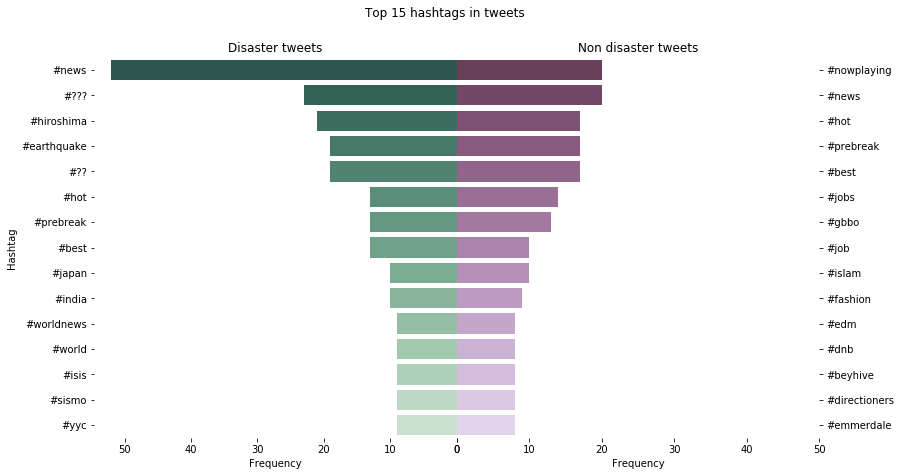

In [142]:
f, axes = plt.subplots(1, 2, figsize=(13,7))
f.subplots_adjust(wspace=0)

#Hashtags comunes para los desastres
disasters_most_common_hashtags = Counter(disaster_hashtags.split()).most_common(15)
top_15_used_hashtags_in_disasters = pd.DataFrame({
            'word':list(map(getMostCommonValue, disasters_most_common_hashtags)), 
            'freq':list(map(getMostCommonFreq, disasters_most_common_hashtags))
        })

plt_top_15_used_hashtags_in_disasters = sns.barplot(x='freq', y='word', data=top_15_used_hashtags_in_disasters, orient='h', ax=axes[0],
                                                    palette=sns.cubehelix_palette(start=2.5, rot=-0.2, dark=0.3, n_colors=15, reverse=True)
                                                   )
plt_top_15_used_hashtags_in_disasters.set_xlabel('Frequency')
plt_top_15_used_hashtags_in_disasters.set_ylabel('Hashtag')
plt_top_15_used_hashtags_in_disasters.set(title="Disaster tweets")

plt_top_15_used_hashtags_in_disasters.invert_xaxis()

#Hashtags comunes para los no desastres
non_disasters_most_common_hashtags = Counter(non_disaster_hashtags.split()).most_common(15)
top_15_used_hashtags_in_non_disasters = pd.DataFrame({
            'word':list(map(getMostCommonValue, non_disasters_most_common_hashtags)), 
            'freq':list(map(getMostCommonFreq, non_disasters_most_common_hashtags))
        })

plt_top_15_used_hashtags_in_non_disasters = sns.barplot(x='freq', y='word', data=top_15_used_hashtags_in_non_disasters, orient='h', ax=axes[1], 
                                                    palette=sns.cubehelix_palette(start=0.75, rot=-0.2, dark=0.3, n_colors=15, reverse=True)
                                                   )
plt_top_15_used_hashtags_in_non_disasters.set_xlabel('Frequency')
plt_top_15_used_hashtags_in_non_disasters.set_ylabel('')
plt_top_15_used_hashtags_in_non_disasters.set(title="Non disaster tweets")

plt_top_15_used_hashtags_in_non_disasters.set_xticks([0, 10, 20, 30, 40, 50])

plt_top_15_used_hashtags_in_non_disasters.yaxis.tick_right()

ax=plt_top_15_used_hashtags_in_non_disasters.ax
def annotateBars(row, ax=ax): 
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                    textcoords='offset points') 
plt_top_15_used_hashtags_in_non_disasters = df.apply(annotateBars, ax=ax, axis=1)

sns.despine(left=True, bottom=True)
f.suptitle('Top 15 hashtags in tweets')

### Wordclouds

In [25]:
disaster_mentions = " ".join(disasters.loc[disasters['target'] == 1, 'mentions'])
non_disaster_mentions = " ".join(disasters.loc[disasters['target'] == 0, 'mentions'])

In [17]:
#Funciones de ayuda para colorear los wordcloud por clase
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [37]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

temp_mask = np.array(Image.open("hashtag_mask.png"))
hashtag_mask = np.ndarray((temp_mask.shape[0],temp_mask.shape[1]), np.int32)

for i in range(len(temp_mask)):
    hashtag_mask[i] = list(map(transform_format, temp_mask[i]))

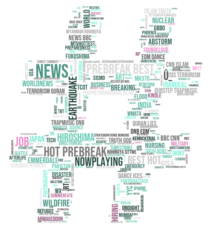

In [170]:
hashtags_wc = WordCloud(font_path='fonts/BebasNeue-Regular.ttf', mask=hashtag_mask, width=1000, height=500, max_font_size=70, max_words=300, background_color="white").generate(disaster_hashtags + " " + non_disaster_hashtags)

hashtag_colors = {
    '#2D574E': list(map(lambda x: x[1:len(x)], disaster_hashtags.split())),
    '#673F59': list(map(lambda x: x[1:len(x)], non_disaster_hashtags.split()))
}

hashtags_wc.recolor(color_func=GroupedColorFunc(hashtag_colors, 'black'))

hashtags_wc.to_file("plots/hashtags_wc.png")

plt.imshow(hashtags_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

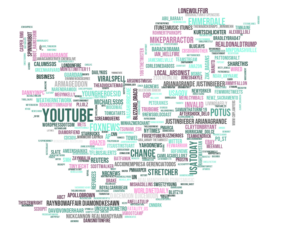

In [173]:
mention_mask = np.array(Image.open("twitter_mask.png"))

mentions_wc = WordCloud(font_path='fonts/BebasNeue-Regular.ttf', mask=mention_mask, width=1000, height=500, max_font_size=70, max_words=300, background_color="white").generate(disaster_mentions + " " + non_disaster_mentions)

mention_colors = {
    '#2D574E': list(map(lambda x: x[1:len(x)], disaster_mentions.split())),
    '#673F59': list(map(lambda x: x[1:len(x)], non_disaster_mentions.split()))
}

mentions_wc.recolor(color_func=GroupedColorFunc(mention_colors, 'black'))

mentions_wc.to_file("plots/mentions_wc.png")

plt.imshow(mentions_wc, interpolation='bilinear')
plt.axis("off")
plt.show()